In [24]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
#load the data
data = pd.read_csv(rf"C:\Users\Wahaj Sajid\Desktop\Datasets\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
#check for the null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
#drop the "customer_id" table as we don't need it
data = data.drop(columns=['CustomerID', 'Gender', 'Age'],axis=1)

In [20]:
#data after preprocessing
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [29]:
#scale the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [30]:
#build the model
model = KMeans(n_clusters=3, random_state=42)
model.fit(data)

c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [38]:
data = pd.DataFrame(data)

In [40]:
print(data.columns)

Index(['Annual_income', 'Spending_Score', 'Cluster'], dtype='object')


In [44]:
data.head()

,Annual_income,Spending_Score,Cluster
0,0.000000,0.387755,2
1,0.000000,0.816327,2
2,0.008197,0.051020,0
3,0.008197,0.775510,2
4,0.016393,0.397959,2


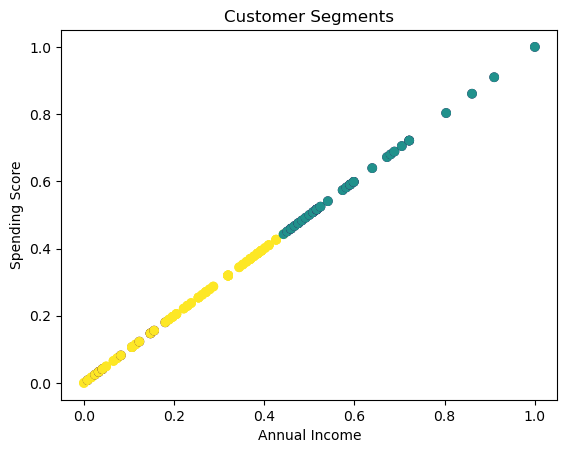

In [41]:
data['Cluster'] = model.labels_

# Step 4: Visualize
plt.scatter(data['Annual_income'], data['Annual_income'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()